* Misst den Abstand eines neuen Datenpunktes zu den `k` nähesten Datenpunkten, um herauszufinden, zu welcher Klasse dieser gehört.
* Nicht generalisierender ML-Algorithmus, da die vorhandenen Datenpunkte einfach "erinnert" werden.

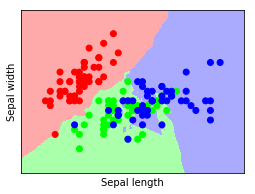

In [7]:
import numpy as np
import pylab as pl
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. 
Y = iris.target

h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Farben für die Darstellung festlegen
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
pl.scatter(X[:,0], X[:,1],c=Y, cmap=cmap_bold)
pl.xlabel('Sepal length')
pl.ylabel('Sepal width')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

## Weiterführende Fragen

Wofür könnte das k-nearest-neighbor Verfahren sinnvoll genutzt bzw. erweitert werden, wenn die Labels für die Klassifizierung nicht vorliegen? _Stichwort: Unsupervised Learning_

K-nearest-neighbor kann auch für Regressionsprobleme genutzt werden. Wie 